# Séance projet 2

## 1. Préparation du travail
**Question 1 :** Importer ci-dessous tous les modules que vous jugerez nécessaires.

In [94]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Imports nécessaires

**Question 2 :** Charger le jeu de données prétraité fourni à l'issue de la séance 1 qui se trouve dans le fichier `JO_clean.csv` et afficher les 5 premières lignes pour vérifier que le chargement a été effectué correctement. 

Pensez à télécharger au préalable le fichier `JO_clean.csv` et à le placer dans le même dossier que votre notebook.

Si vous avez importé le notebook sur Google Colab, il faut exécuter la cellule ci-dessous au préalable pour télécharger votre jeu de données dans votre environnement de travail sur Colab (inutile dans le cas où vous exécutez le notebook sur votre propre machine) :

In [95]:
!wget https://git.unistra.fr/dbernhard/isdd_data/raw/master/JO_clean.csv

dyld: Library not loaded: /usr/local/opt/gettext/lib/libintl.8.dylib
  Referenced from: /usr/local/bin/wget
  Reason: image not found


In [96]:
JO = pd.read_csv('JO_clean.csv')

JO.head(n=5)

# Chargement du jeu de données et affichage des 5 premières lignes

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


## 2. Représentations numériques 

**Question 3** : Résumer de façon numérique le jeu de données prétraité. Vérifier la cohérence des valeurs obtenues, notamment en ce qui concerne l'âge, la taille et le poids des athlètes. 

In [97]:
# Réponse à la question

JO.describe()

,ID,Age,Height,Weight,Year
count,205882.000000,205882.000000,205882.000000,205882.000000,205882.000000
mean,68599.340098,25.057159,175.378037,70.695772,1989.665109
std,38993.668617,5.480037,10.546582,14.342766,20.128761
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35177.000000,21.000000,168.000000,60.000000,1976.000000
50%,68609.000000,24.000000,175.000000,70.000000,1992.000000
75%,102288.500000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


=======> Toutes les valeurs semblent cohérentes, notamment les médianes, min, max et moyennes en terme d'âge, de taille et de poids. Quelques valeurs (âge 11 ans) sont certes étonnantes, mais pas impossibles.

## 3. Représentations graphiques

**Question 4** : Représenter le nombre de participations enregistrées par disciplines.

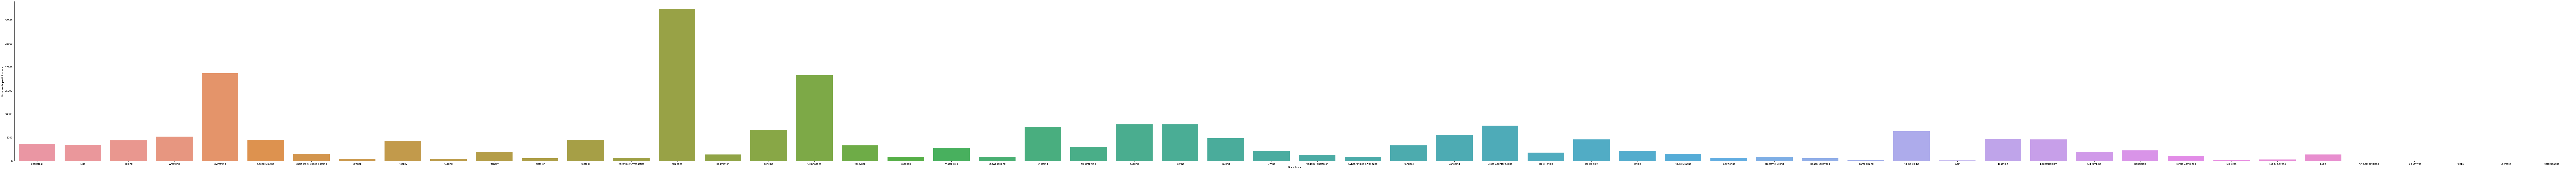

In [98]:
# Représentation du nombre de participations par disciplines

# Nous utilisons un catplot de la librairie Seaborn (diagramme en bâtons)

x = pd.DataFrame(JO, columns=['Sport']) 

sns.catplot(x="Sport", kind="count", data = x, height = 10, aspect = 15)
plt.xlabel('Disciplines')
plt.ylabel('Nombre de participations')
plt.show()

**Question 5** : Dans quelle discipline enregistre-t-on le plus grand nombre de participations ? A combien s'élève ce nombre de participations ? 

In [99]:
# Réponse à la question 

athletics = JO[JO["Sport"] == "Athletics"]

print (athletics["Sport"].count())

32348


=======> Nous remarquons du diagramme précédent que la discipline la plus présente est "Athletics" avec 32348 participations

**Question 6 :** Que dire de la participation femme/homme au cours des différentes éditions des JO ? Quelle(s) représentation(s) graphique(s) permette(nt) de mieux illustrer l'évolution de la participation femme/homme ?

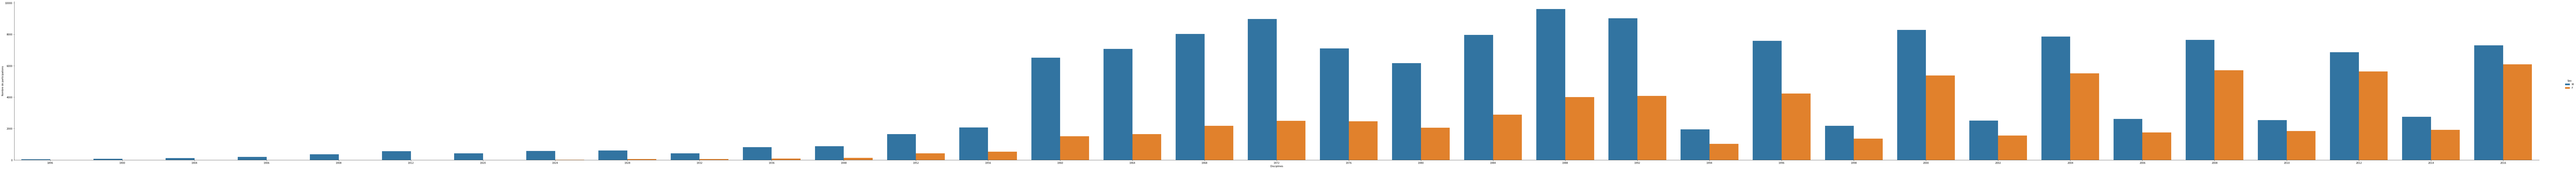

In [100]:
x = pd.DataFrame(JO, columns=['Year','Sex']) 

sns.catplot(x="Year", kind="count", hue = "Sex",data = x, height = 10, aspect = 15)
plt.xlabel('Disciplines')
plt.ylabel('Nombre de participations')
plt.show()

======> Nous remarquons que les femmes ont participé pour la première fois aux JO en 1920 et que depuis cette date leur participation n'a cessé de augmenter jusqu'à atteindre quasiment celle des hommes en 2016

**Question 7** : Créer un DataFrame ne contenant que les athlètes ayant remporté une médaille. Combien de médailles d'or la France a-t-elle remportée depuis le début des JO ? 

In [103]:
# Création d'un DataFrame d'athlètes médaillés. 

winners = JO.dropna(how='any')

winners.head()

# Proposition d'une méthode pour calculer le nombre de médailles d'or.

gold = winners["Medal"] == "Gold"

french = winners["country"] == "France"

french_gold = winners [french & gold]

print (len(french_gold))

283


=========> Le nombre de médailles d'or que la France a remportées est 283

**Question 8 :** Représenter le nombre de médailles d'or françaises au cours du temps. Comment expliquer l'allure du graphe entre les années 1996 et 2016 ?  

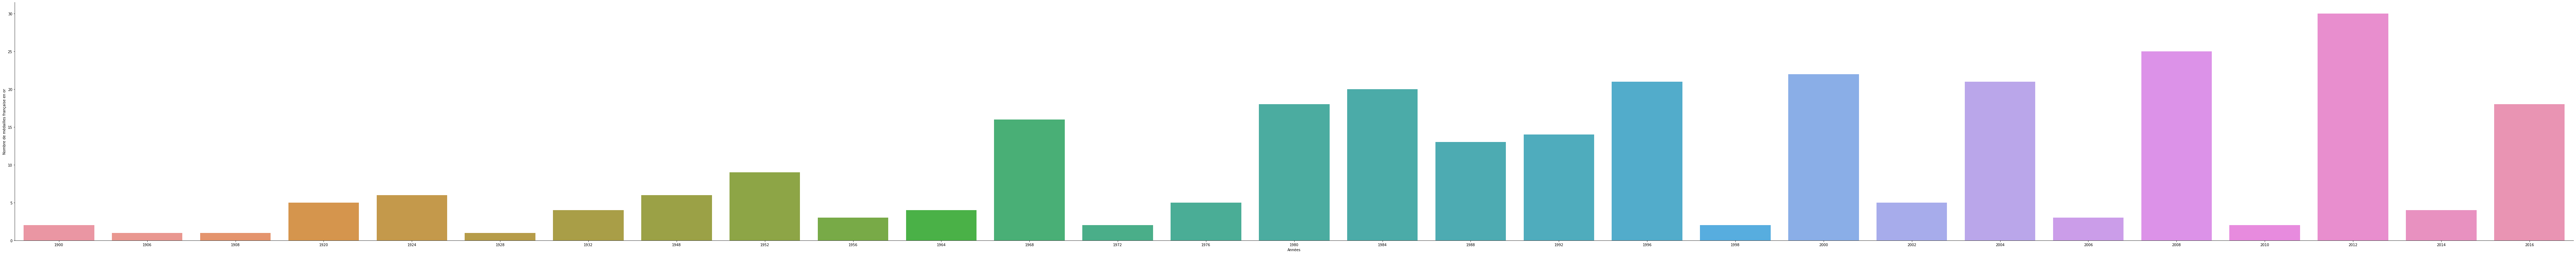

In [108]:
# Représentation graphique de l'évolution du nombre de médailles d'or françaises au cours du temps

y = pd.DataFrame(french_gold, columns=['Year']) 

sns.catplot(x="Year", kind="count", data = y, height = 10, aspect = 10)
plt.xlabel('Années')
plt.ylabel('Nombre de médailles française en or')
plt.show()

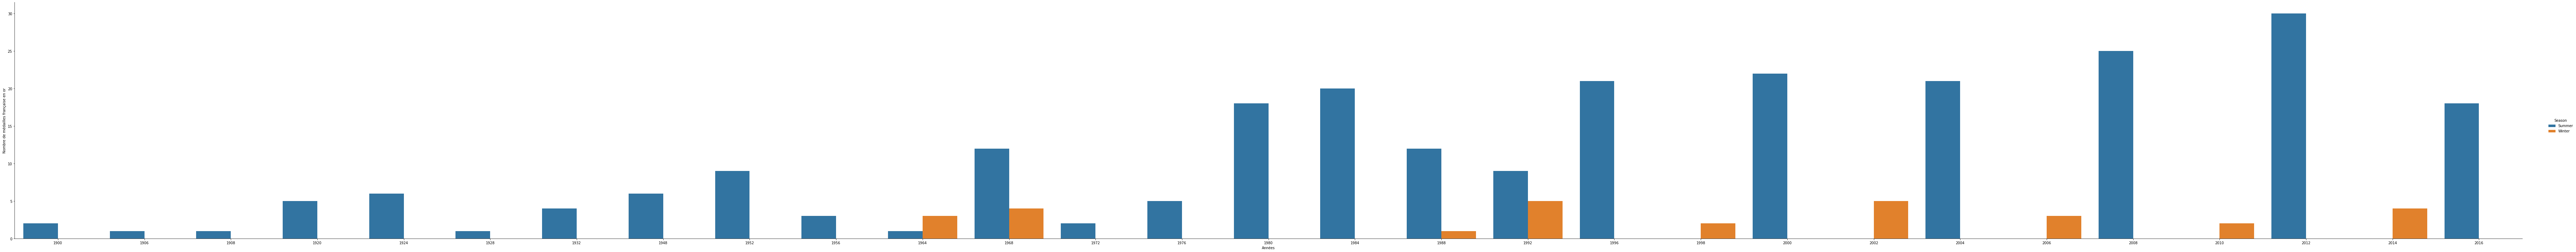

In [109]:
# Représentation graphique de l'évolution du nombre de médailles d'or françaises au cours du temps, par saison

# Distinction jeux olympiques d'hiver vs jeux olympiques d'été

y = pd.DataFrame(french_gold, columns=['Year','Season']) 

sns.catplot(x="Year", kind="count", hue = "Season", data = y, height = 10, aspect = 10)
plt.xlabel('Années')
plt.ylabel('Nombre de médailles française en or')
plt.show()

========> Nous remarquons globalement une augmentation des médailles françaises entre 1996 et 2016, (avec certains exceptions par exemple en été 2012) que ce soit en hiver ou en été. Ceci peut être dû aux nombres de participations qui augmente ou à l'augmentation du nombre de disciplines. 

# Commentaires libres 

Vous pouvez décrire ci-dessous tout ce que vous avez pu remarquer d’intéressant sur ce jeu de données, ou des problèmes particuliers que vous avez pu rencontrer. N’oubliez pas de commenter et décrire votre code, et de préciser les questions auxquelles il permet de répondre.